In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

Using TensorFlow backend.


In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])
9999

9999

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [10]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [12]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

In [13]:
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

In [14]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [15]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [16]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 6s 387us/step - loss: 0.5130 - acc: 0.7823 - val_loss: 0.3795 - val_acc: 0.8753
Epoch 2/20
15000/15000 [==============================] - 4s 285us/step - loss: 0.2985 - acc: 0.9056 - val_loss: 0.3045 - val_acc: 0.8868
Epoch 3/20
15000/15000 [==============================] - 4s 278us/step - loss: 0.2205 - acc: 0.9259 - val_loss: 0.2793 - val_acc: 0.8909
Epoch 4/20
15000/15000 [==============================] - 4s 279us/step - loss: 0.1714 - acc: 0.9436 - val_loss: 0.2747 - val_acc: 0.8904
Epoch 5/20
15000/15000 [==============================] - 4s 282us/step - loss: 0.1378 - acc: 0.9561 - val_loss: 0.3100 - val_acc: 0.8786oss: 0.139
Epoch 6/20
15000/15000 [==============================] - 4s 281us/step - loss: 0.1154 - acc: 0.9630 - val_loss: 0.3054 - val_acc: 0.8835
Epoch 7/20
15000/15000 [==============================] - 4s 290

In [17]:
history_dict = history.history
>>> history_dict.keys()
[u'acc', u'loss', u'val_acc', u'val_loss']

['acc', 'loss', 'val_acc', 'val_loss']

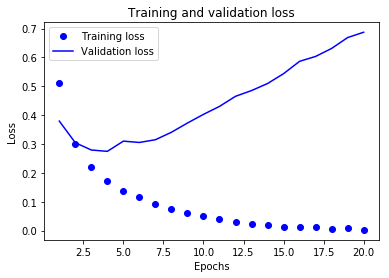

In [22]:
import matplotlib.pyplot as plt
acc=history_dict["acc"]
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

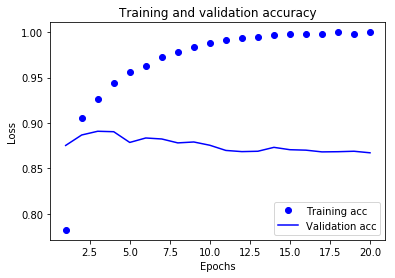

In [25]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values , 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 5s 209us/step - loss: 0.4863 - acc: 0.8078 7s - loss: 0.6624 - acc: 0 - ETA: 5s - los - ETA: 1s - loss: 0.5253 
Epoch 2/4
25000/25000 [==============================] - 4s 179us/step - loss: 0.2829 - acc: 0.9068 3s - loss: 0.3024 - acc: 0.9 - ETA: 3s - l - ETA: 0s - loss: 0.2867 - acc
Epoch 3/4
25000/25000 [==============================] - 4s 179us/step - loss: 0.2144 - acc: 0.9254 3s - loss: - ETA: 1s - loss: 0.2159 - - ETA: 0s - loss: 0.2151 - acc: 0.9
Epoch 4/4
25000/25000 [==============================] - 5s 204us/step


In [27]:
results

[0.2852224002933502, 0.88592]

In [28]:
model.predict(x_test)

array([[0.19469738],
       [0.9973506 ],
       [0.8643615 ],
       ...,
       [0.08955675],
       [0.06614119],
       [0.65706   ]], dtype=float32)

# APPLYING DIFFERENT PARAMETERS

In [29]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
#model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 5s 205us/step - loss: 0.4497 - acc: 0.8260 9s - loss: - ETA: 2s - loss
Epoch 2/4
25000/25000 [==============================] - 4s 177us/step - loss: 0.2766 - acc: 0.9068
Epoch 3/4
25000/25000 [==============================] - 4s 178us/step - loss: 0.2188 - acc: 0.9257 0s - loss: 0.2176 - acc: 0 - ETA: 0s - loss: 0.2200 - acc: 0.9 - ETA: 0s - loss: 0.2192 - acc: 0.9
Epoch 4/4
25000/25000 [==============================] - 5s 183us/step


In [30]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 5s 211us/step - loss: 0.5135 - acc: 0.7692
Epoch 2/4
25000/25000 [==============================] - 4s 178us/step - loss: 0.2710 - acc: 0.9054 2s - 
Epoch 3/4
25000/25000 [==============================] - 4s 180us/step - loss: 0.2010 - acc: 0.9274 4s - loss: 0.2255 - acc: - ETA: 3s - loss: 0.2065 - acc: - ETA: 2s - loss: 0.2051 - a - ETA: 1s - loss: 0.2065 - acc: 0.9 - ETA: 1s - loss: 0.2069 - acc: 0.9 - ETA: 1s - loss: 0.2045 - acc: - ETA: 0s - loss: 0.2023 - acc:
Epoch 4/4
25000/25000 [==============================] - 5s 219us/step


# multiclass classification 9-oct-19

In [31]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

2113536/2110848 [==============================] - 2s 1us/step


In [32]:
len(train_data)

8982

In [33]:
len(test_data)

2246

In [34]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [35]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

557056/550378 [==============================] - 1s 1us/step


In [36]:
train_labels[10]

3

In [38]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [40]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [41]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [42]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [43]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [44]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [45]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 338us/step - loss: 2.5803 - acc: 0.5169 - val_loss: 1.7257 - val_acc: 0.6210
Epoch 2/20
7982/7982 [==============================] - 2s 235us/step - loss: 1.4001 - acc: 0.7011 - val_loss: 1.2840 - val_acc: 0.7220
Epoch 3/20
7982/7982 [==============================] - 2s 236us/step - loss: 1.0319 - acc: 0.7844 - val_loss: 1.1203 - val_acc: 0.7650
Epoch 4/20
7982/7982 [==============================] - 2s 236us/step - loss: 0.8156 - acc: 0.8284 - val_loss: 1.0261 - val_acc: 0.7870
Epoch 5/20
7982/7982 [==============================] - 2s 237us/step - loss: 0.6457 - acc: 0.8637 - val_loss: 0.9504 - val_acc: 0.8120
Epoch 6/20
7982/7982 [==============================] - 2s 236us/step - loss: 0.5189 - acc: 0.8936 - val_loss: 0.9244 - val_acc: 0.8200
Epoch 7/20
7982/7982 [==============================] - 2s 246us/step - loss: 0.4159 - acc: 0.9139 - val_loss: 0.8791 - val_acc: 0.8170


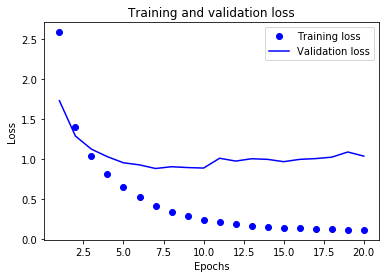

In [46]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

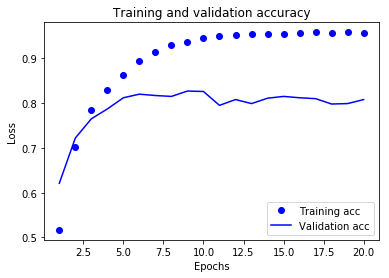

In [47]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [48]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 3s 325us/step - loss: 2.5929 - acc: 0.4939 - val_loss: 1.7298 - val_acc: 0.6170
Epoch 2/9
7982/7982 [==============================] - 2s 199us/step - loss: 1.4379 - acc: 0.6863 - val_loss: 1.3252 - val_acc: 0.7010
Epoch 3/9
7982/7982 [==============================] - 2s 245us/step - loss: 1.0850 - acc: 0.7636 - val_loss: 1.1421 - val_acc: 0.7430
Epoch 4/9
7982/7982 [==============================] - 2s 254us/step - loss: 0.8606 - acc: 0.8166 - val_loss: 1.0354 - val_acc: 0.7720
Epoch 5/9
7982/7982 [==============================] - 2s 244us/step - loss: 0.6824 - acc: 0.8517 - val_loss: 0.9677 - val_acc: 0.7980
Epoch 6/9
7982/7982 [==============================] - 2s 245us/step - loss: 0.5508 - acc: 0.8809 - val_loss: 0.9182 - val_acc: 0.8110
Epoch 7/9
7982/7982 [==============================] - 2s 237us/step - loss: 0.4420 - acc: 0.9053 - val_loss: 0.9133 - val_acc: 0.8100
Epoch 8